In [1]:
# Author       : Utkarsh Kulshrestha
# E-Mail       : kuls.utkarsh1205@gmail.com
# Contact      : +91-8197094433
# Designation  : Artificial Intelligence Engineer
# Regression Analysis for House Prices

## Import the Libraries and Data

In [2]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [4]:
#house = pd.read_excel('/home/utkarsh/LearnBay/ML_Python/Maison.xlsx') ## Reading the data
house = pd.read_csv("Dataset/Maison.csv")

In [5]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [6]:
house.shape

(546, 12)

# Data Transformations & Analysis

In [7]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [8]:
house.head()
house.shape

(546, 12)

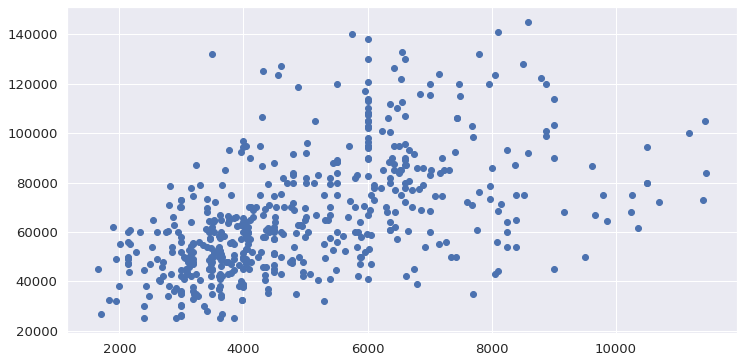

In [48]:
# Let's see ig we have a linear relation between price and area
#sns.palettes(house['area'], house['price'], palette = 'viridis')
plt.scatter(x=house['area'], y=house['price'])
plt.show()

In [46]:
# Remove Outlier
house = house[(house.area<12000)  & (house.price<150000)]

<Figure size 2160x4320 with 0 Axes>

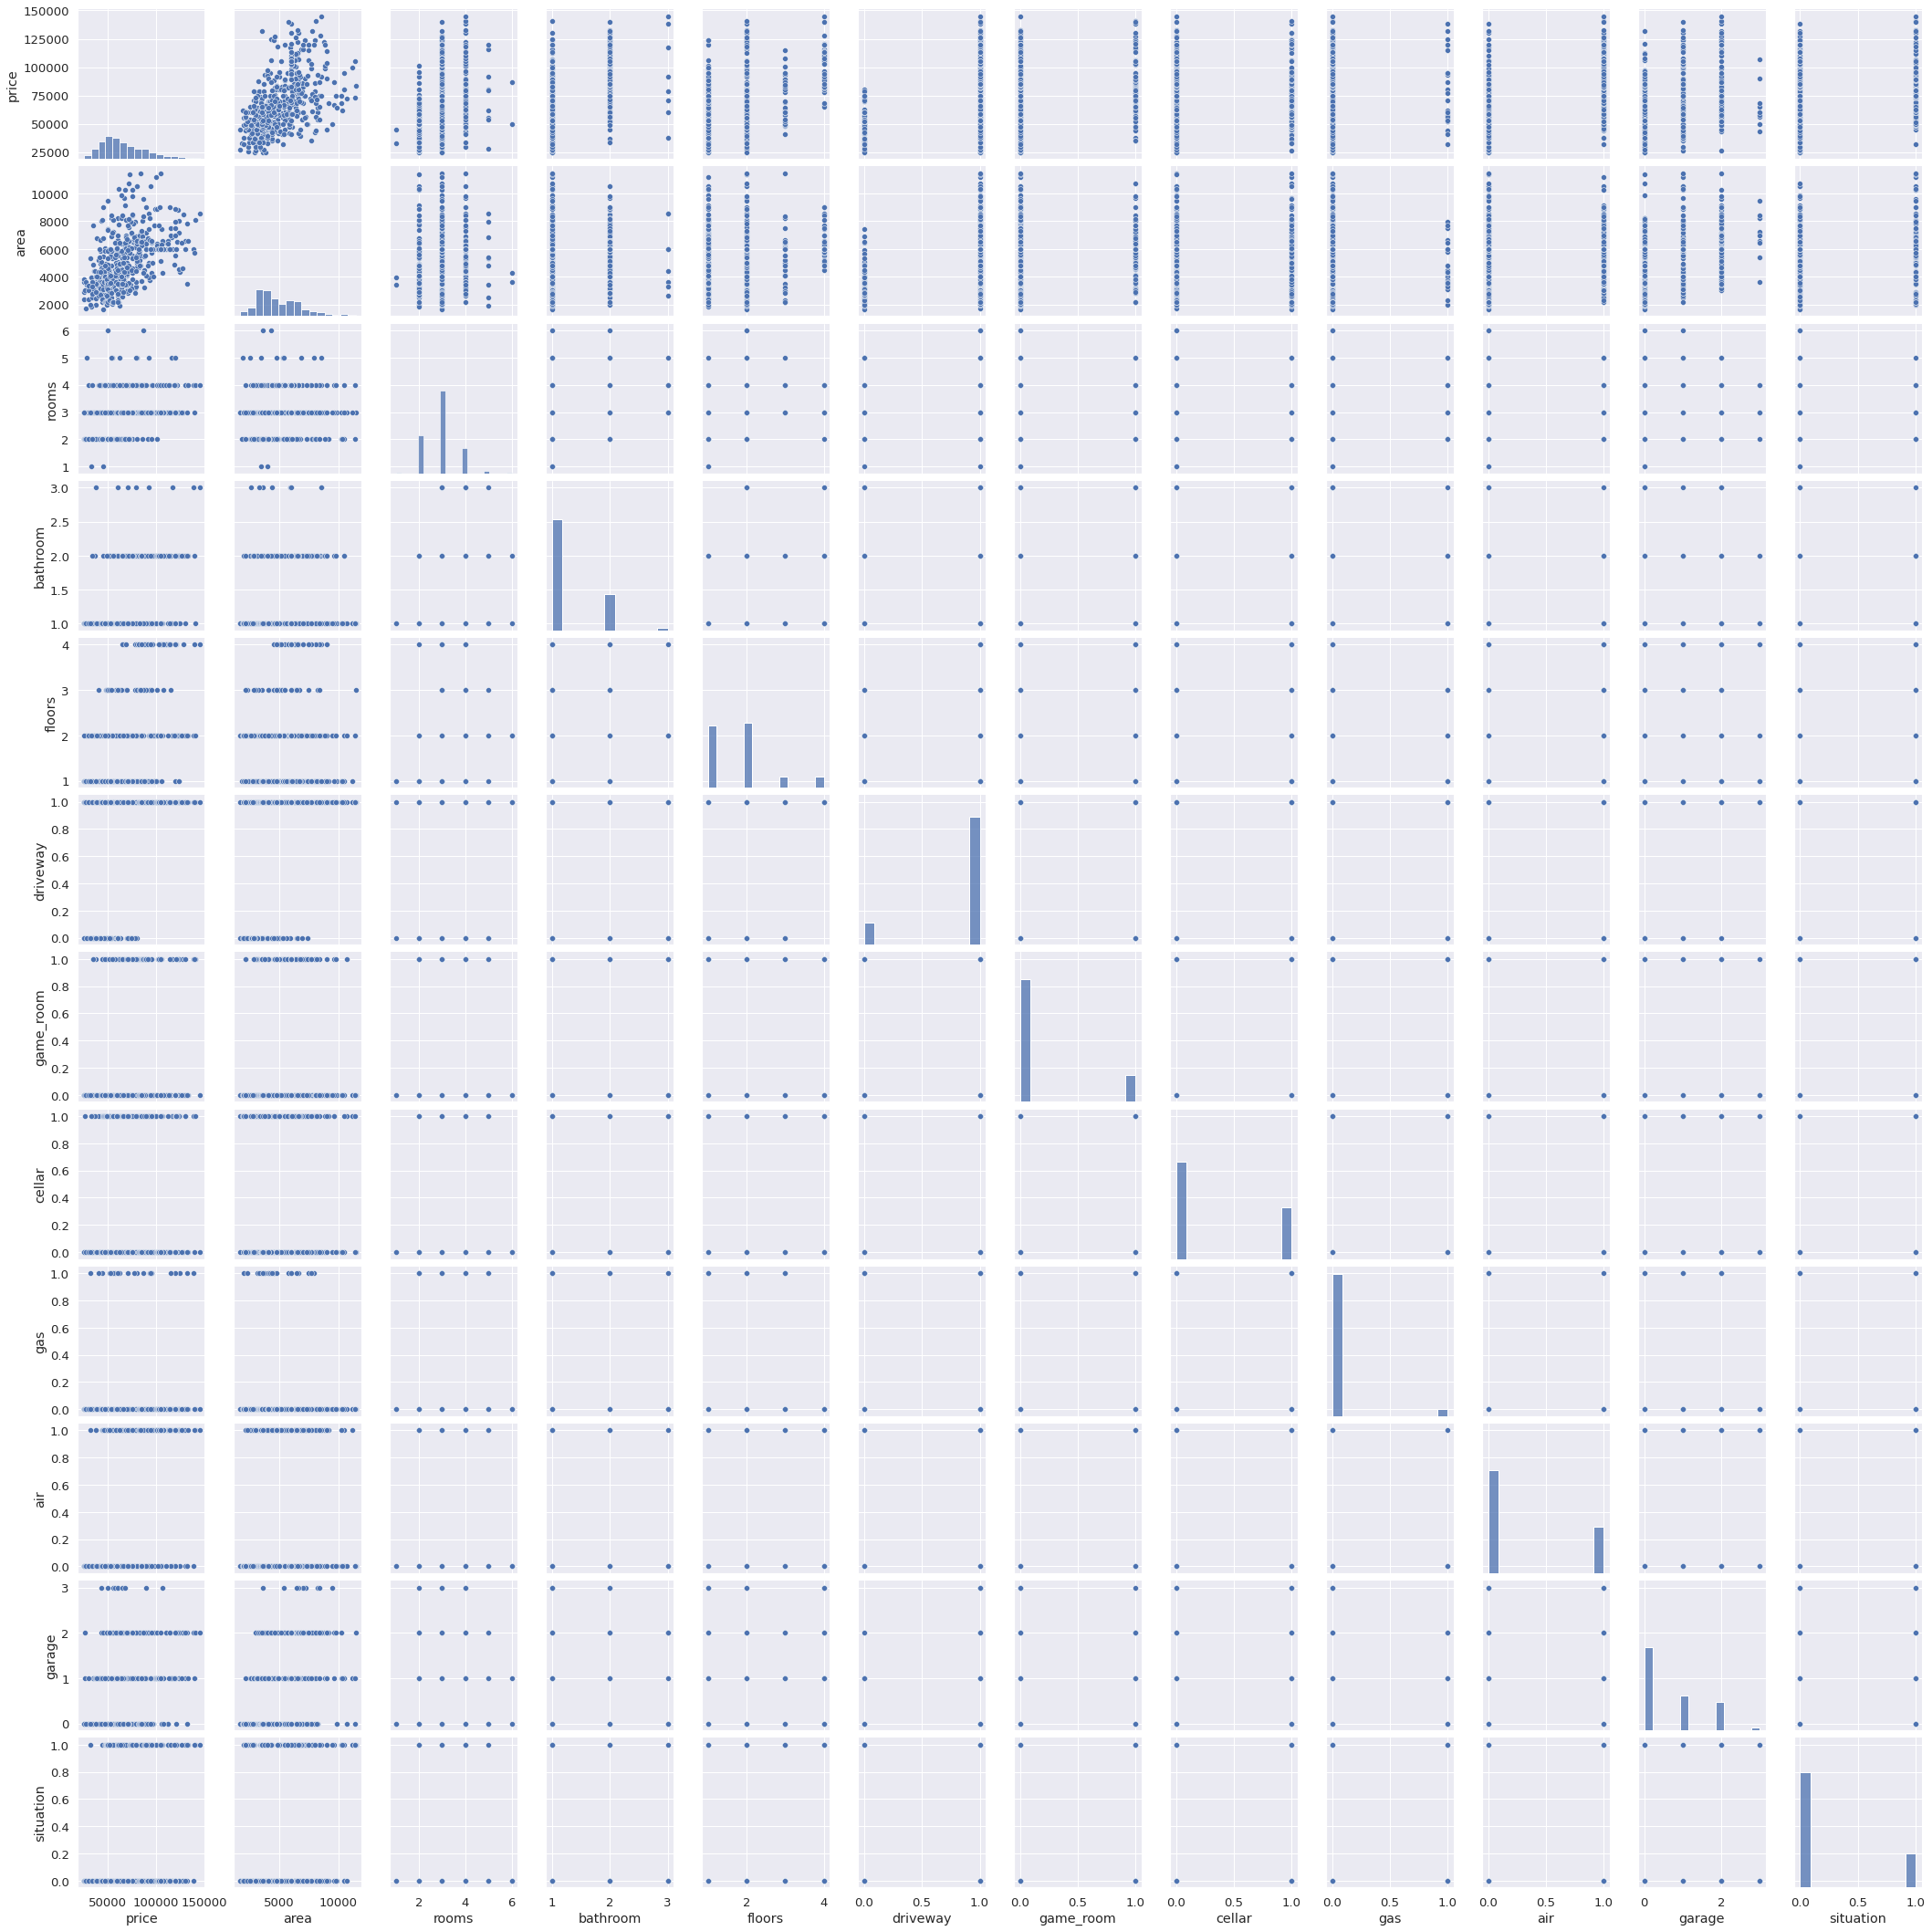

In [47]:
plt.figure(figsize=[30,60])
sp = sns.pairplot(house)
sp.savefig('out.png')
plt.show()

In [49]:
# Drop duplicate
house = house.drop_duplicates()
# data.head()
house.shape

(532, 12)

In [50]:
# Dropping columns where unique value is 1 as that will be a redundant column
unique = house.apply(lambda x: x.nunique())
house = house.drop(unique[unique < 2].index, axis = 1)
house.shape

(532, 12)

In [51]:
from scipy import stats
num_col = house.columns
# Outlier Treatment
z = np.abs(stats.zscore(house[num_col]))

# Outliers Removed Records
select = house[num_col][(z < 5).all(axis = 1)]
house = house.loc[select.index]
house

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


<AxesSubplot:>

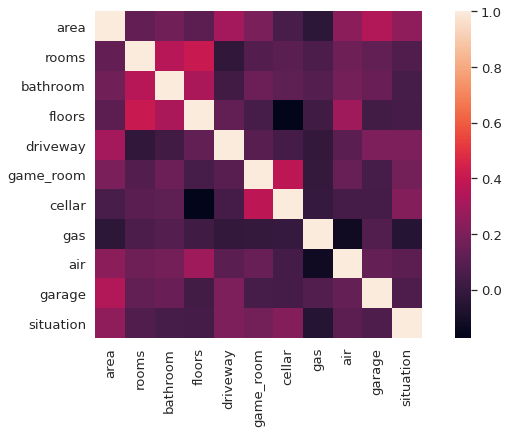

In [52]:
# Check Correlation
corr = house.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
#fig = plt.figure()
sns.set(font_scale=1.2)  
sns.heatmap(corr, vmax=1, square=True)

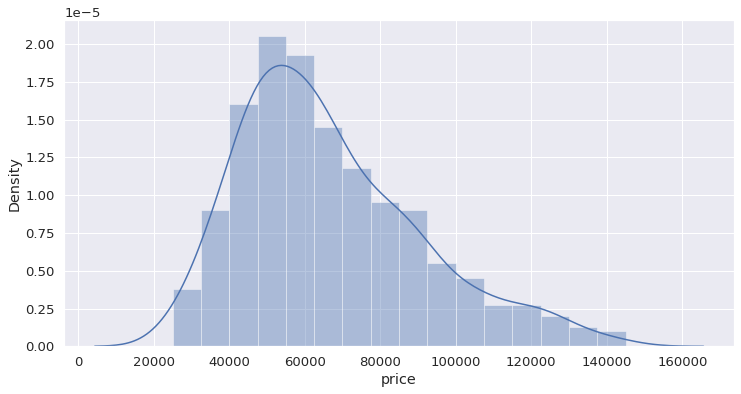

In [53]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()

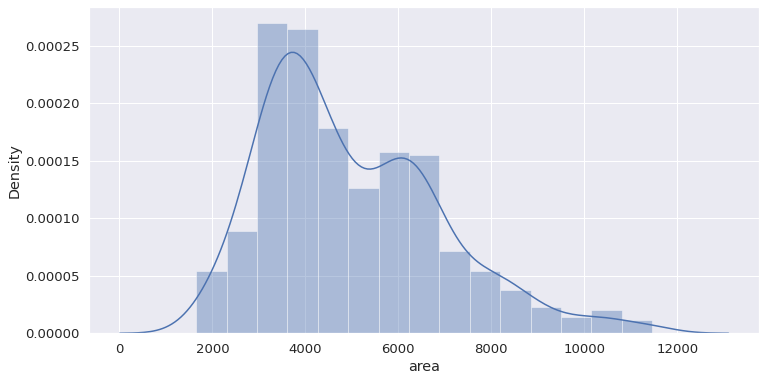

In [54]:
sns.distplot(house['area'])
plt.show()

In [55]:
house.apply(lambda x: x.isnull().sum())

price        0
area         0
rooms        0
bathroom     0
floors       0
driveway     0
game_room    0
cellar       0
gas          0
air          0
garage       0
situation    0
dtype: int64

In [56]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.00000,532.000000,532.000000
mean,66530.060150,5004.043233,2.953008,1.272556,1.804511,0.855263,0.180451,0.347744,0.045113,0.31015,0.667293,0.229323
std,24084.694181,1922.096600,0.733674,0.478304,0.867567,0.352166,0.384925,0.476703,0.207747,0.46299,0.843844,0.420793
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,49000.000000,3535.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,61300.000000,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,80000.000000,6265.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000
max,145000.000000,11460.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,1.000000


In [57]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [58]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [59]:
# let's do the split of the dataset
house.columns
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house['price']

In [78]:
from sklearn.model_selection import cross_validate

In [79]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
cv_results=cross_validate(lm, X_train, y_train, cv=10)
sorted(cv_results.keys())
cv_results['test_score']

array([0.72952761, 0.58526614, 0.55019907, 0.36676457, 0.54820551,
       0.42575347, 0.51479189, 0.79815249, 0.74510672, 0.66156712])

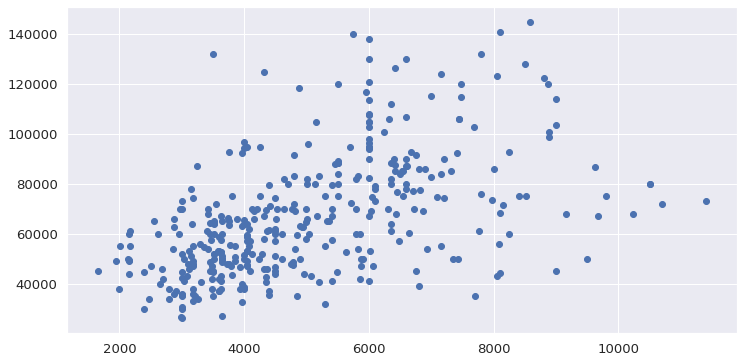

In [80]:
plt.scatter(X_train['area'],y_train)
plt.show()

In [81]:
## Let's check the head of some of these splits
X_test.head()
# We see that they are randomly selected

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
108,3000,3,2,2,1,1,1,0,0,0,0
8,4800,3,1,1,1,1,1,0,0,0,0
101,3300,3,3,2,1,0,1,0,0,0,0
397,6660,4,2,2,1,1,1,0,0,1,1
315,6210,4,1,4,1,1,0,0,1,0,0


In [83]:
# Now let's build the model using sklearn
lm.fit(X_train,y_train)

LinearRegression()

In [84]:
# Now let's look at the coefficients
print(lm.coef_)
# it would be nicer if we can put them together in a dataframe

[3.43681460e+00 2.17394683e+03 1.07447549e+04 6.85234766e+03
 6.99625258e+03 4.24491585e+03 5.57023294e+03 1.62613644e+04
 1.08852227e+04 3.73457915e+03 8.92512181e+03]


In [85]:
coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coef

,Coefficients
area,3.436815
rooms,2173.946832
bathroom,10744.754949
floors,6852.347663
driveway,6996.252585
game_room,4244.915847
cellar,5570.232942
gas,16261.364394
air,10885.222719
garage,3734.579150


In [86]:
y_pred = lm.predict(X_test)
d = {"Actual-Price":y_test,"Predicted-Price":np.ceil(y_pred),"Differ":(y_test-np.ceil(y_pred))}

In [87]:
df = pd.DataFrame(d)
df

,Actual-Price,Predicted-Price,Differ
108,73000,68360.0,4640.0
8,83800,56949.0,26851.0
101,79000,75891.0,3109.0
397,80750,95772.0,-15022.0
315,78000,89841.0,-11841.0
...,...,...,...
459,47000,59357.0,-12357.0
219,64500,56405.0,8095.0
213,52000,46993.0,5007.0
144,57250,62414.0,-5164.0


In [68]:
final_joint_data = X_test.join(df)
final_joint_data

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation,Actual-Price,Predicted-Price,Differ
108,3000,3,2,2,1,1,1,0,0,0,0,73000,68360.0,4640.0
8,4800,3,1,1,1,1,1,0,0,0,0,83800,56949.0,26851.0
101,3300,3,3,2,1,0,1,0,0,0,0,79000,75891.0,3109.0
397,6660,4,2,2,1,1,1,0,0,1,1,80750,95772.0,-15022.0
315,6210,4,1,4,1,1,0,0,1,0,0,78000,89841.0,-11841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2145,3,1,2,1,0,1,0,0,0,1,47000,59357.0,-12357.0
219,3510,3,1,3,1,0,0,0,0,0,0,64500,56405.0,8095.0
213,3180,3,1,2,0,0,1,0,0,0,0,52000,46993.0,5007.0
144,4500,3,1,2,0,0,1,0,1,0,0,57250,62414.0,-5164.0


In [69]:
final_joint_data.to_csv('final_joint_data.csv',index=False)

In [70]:
lm.score(X_test,y_test)

0.6731982183245271

In [71]:
import statsmodels.api as sm

In [72]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)

In [73]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [74]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     62.53
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.34e-76
Time:                        23:50:37   Log-Likelihood:                -4083.8
No. Observations:                 372   AIC:                             8192.
Df Residuals:                     360   BIC:                             8239.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -478.4793   4099.790     -0.117      0.907   -8541.025    7584.067
area           3.4368      0.474      7.256      0.000       2.505       4.368
rooms       2173.9468   1318.825      1.648      0.100    -419.621    4767.515
bathroom    1.074e+04   1822.191      5.897      0.000    7161.279    1.43e+04
floors      6852.3477   1035.961      6.614      0.000    4815.052    8889.643
driveway    6996.2526   2416.057      2.896      0.004    2244.895    1.17e+04
game_room   4244.9158   2184.053      1.944      0.053     -50.190    8540.021
cellar      5570.2329   1832.369      3.040      0.003    1966.741    9173.724
gas         1.626e+04   3516.534      4.624      0.000    9345.835    2.32e+04
air         1.089e+04   1775.897      6.129      0.000    7392.787    1.44e+04
garage      3734.5791    959.047      3.894      0.000    1848.541    5620.617
situation   8925.1218   1869.880      4.773      0.000    5247.862    1.26e+04
==============================================================================
Omnibus:                       31.918   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.329
Skew:                           0.522   Prob(JB):                     3.56e-13
Kurtosis:                       4.615   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
predictions = lm.predict(X_test)

<AxesSubplot:xlabel='price'>

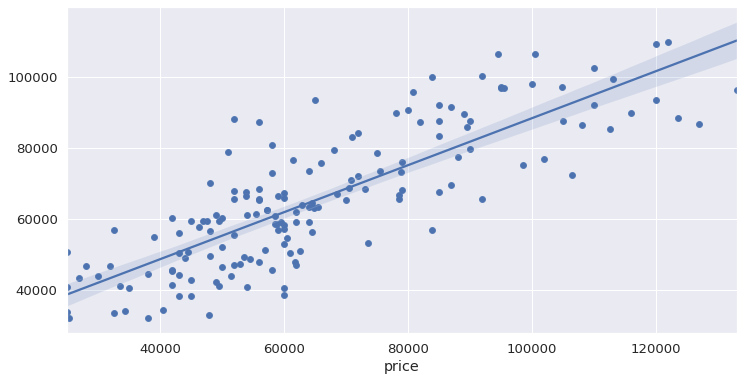

In [76]:
# To check the quality of our model, let's plot it
sns.scatterplot(y_test, predictions)
sns.regplot(y_test,predictions)

In [77]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
#import numpy as np
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 10248.782807401953
MSE : 188311345.17713058
RMSE : 13722.658094448414

MAE : 10476.964446959628
MSE : 184536963.84680256
RMSE : 13584.438297066337


In [43]:
X_endog_test = sm.add_constant(X_test)
model = res.fit()
predictions = model.predict(X_endog_test)

In [44]:
predictions

225     73438.403694
18      36007.078762
48      58037.483910
355     78228.546568
349     61191.495691
           ...      
308     69520.052494
362    104709.675156
189     64009.719276
43     104493.487476
36      45028.814462
Length: 163, dtype: float64